In [72]:
# Initial imports
import os
import requests
import pandas as pd
import ast
import plotly.express as px
import numpy as np
import yfinance as yf
from dotenv import load_dotenv
load_dotenv()

#import matplotlib.pyplot as plt
#%matplotlib inline

# Data used for countries and lat/long 
# https://developers.google.com/public-data/docs/canonical/countries_csv

# Data used to connect list of stock exchanges by country
# https://stockmarketmba.com/globalstockexchanges.php

True

In [73]:
#yfinance example (MSFT)
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show sustainability
sust = msft.sustainability

In [74]:
#ESG Score
sust.loc["totalEsg"].item()

14.63

In [75]:
#Example output of sustainability info
sust.head(5)

,Value
2021-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False


In [76]:
#Rapid API - test MSFT data

rapid_api_key = os.getenv("X-RapidAPI-Key")

url = "https://esg-environmental-social-governance-data.p.rapidapi.com/search"

querystring = {"q":"MSFT"}

headers = {
    'x-rapidapi-key': rapid_api_key,
    'x-rapidapi-host': "esg-environmental-social-governance-data.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

[{"esg_id":4720,"company_name":"Microsoft Corporation","exchange_symbol":"NASDAQ","stock_symbol":"MSFT","environment_grade":"B","environment_level":"Medium","social_grade":"B","social_level":"Medium","governance_grade":"B","governance_level":"Medium","total_grade":"B","total_level":"Medium","disclaimer":"ESG Enterprise\u0027s ESG Rating data (\u0022Scores\u0022) are all based on public information and provided for informational purposes only. No member of ESG Enterprise or related parties make any prediction, warranty or representation whatsoever, expressly or impliedly, either as to the suitability of our Scores for any particular purposes or the validity of any derivative analysis or conclusion based on the Scores.","last_processing_date":"29-04-2021","environment_score":210,"social_score":202,"governance_score":210,"total":622}]


In [77]:
r2 = ast.literal_eval(response.text)
type(r2)

list

In [78]:
#Total ESG score
r2[0]['total']

622

In [98]:
#Set ticker list to be mapped
ticker = ["MSFT", "AAPL", "TSLA"]

In [99]:
ticker_df = pd.DataFrame(ticker)
ticker_df

,0
0,MSFT
1,AAPL
2,TSLA


In [100]:
#Rapid API - pull in data for all tickers

url = "https://esg-environmental-social-governance-data.p.rapidapi.com/search"

headers = {
    'x-rapidapi-key': rapid_api_key,
    'x-rapidapi-host': "esg-environmental-social-governance-data.p.rapidapi.com"
    }

querystring = {"q":[ticker]}

ticker_request = (requests.request("GET", url, headers=headers, params=querystring)).text

esg_score = ast.literal_eval(ticker_request)
esg_score[0]['total']
print('')

In [101]:
#Set iteration loop for tickers
esg_data = []
exchange_data = []

for tickers in ticker:
    querystring = {"q":[tickers]}
    ticker_request = (requests.request("GET", url, headers=headers, params=querystring)).text
    esg_score = ast.literal_eval(ticker_request)[0]['total']
    exchange = ast.literal_eval(ticker_request)[0]['exchange_symbol']
    esg_data.append(esg_score)
    exchange_data.append(exchange)
    print(tickers, esg_score, exchange)

MSFT 622 NASDAQ
AAPL 605 NASDAQ
TSLA 705 NASDAQ


In [102]:
ticker_df["ESG Score"] = esg_data
ticker_df["Exchange"] = exchange_data
ticker_df.columns = ["Company", "ESG Score", "Exchange"]
ticker_df.set_index("Company", inplace=True)
ticker_df

,ESG Score,Exchange
Company,,
MSFT,622,NASDAQ
AAPL,605,NASDAQ
TSLA,705,NASDAQ


In [104]:
# Read the Mapbox API key
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [109]:
# Import country latitude and longitude - note need to change file path to resources folder in github
countries = pd.read_csv("C:/Users/miker/Project1_Fintech_SydUni/Countries.csv")
del countries['country']
countries.rename(columns={'name': 'Country'}, inplace=True)
countries.rename(columns={'latitude': 'Latitude'}, inplace=True)
countries.rename(columns={'longitude': 'Longitude'}, inplace=True)
countries.set_index('Country', inplace=True)

countries.head(5)

,Latitude,Longitude
Country,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Anguilla,18.220554,-63.068615


In [110]:
# Test country loc - longitude
countries.loc['Anguilla'][1]

-63.068615

In [111]:
global_exchanges = pd.read_csv("C:/Users/miker/Project1_Fintech_SydUni/Global_Stock_Exchanges.csv")
del global_exchanges['Bloomberg Exchange Code']
del global_exchanges['Bloomberg Composite Code']
del global_exchanges['Description']
del global_exchanges['ISO MIC']
del global_exchanges['EOD code']
del global_exchanges['# of Stocks']
global_exchanges.rename(columns={'Google Prefix': 'Exchange'}, inplace=True)
global_exchanges = global_exchanges.dropna()
global_exchanges.set_index('Country', inplace=True)

# Add columns into df for latitude and longitude
global_exchanges['Latitude'] = np.nan
global_exchanges['Longitude'] = np.nan

global_exchanges.head(5)

,Exchange,Latitude,Longitude
Country,,,
Australia,ASX,NaN,NaN
Austria,VIE,NaN,NaN
Belgium,EBR,NaN,NaN
Brazil,BVMF,NaN,NaN
Canada,TSE,NaN,NaN


In [112]:
for Country in global_exchanges.index:
    if Country in countries.index:
        lat = countries.loc[Country]['Latitude']
        lon = countries.loc[Country]['Longitude']
        global_exchanges.loc[Country, 'Latitude'] = lat
        global_exchanges.loc[Country, 'Longitude'] = lon
    else: 
        print(Country)

In [113]:
#Bring country into the dataframe
global_exchanges["Country"] = global_exchanges.index
global_exchanges.head(5)

,Exchange,Latitude,Longitude,Country
Country,,,,
Australia,ASX,-25.274398,133.775136,Australia
Austria,VIE,47.516231,14.550072,Austria
Belgium,EBR,50.503887,4.469936,Belgium
Brazil,BVMF,-14.235004,-51.925280,Brazil
Canada,TSE,56.130366,-106.346771,Canada


In [114]:
ticker_df2 = ticker_df.merge(global_exchanges.drop_duplicates(), how="inner", left_on="Exchange", right_on = "Exchange")
ticker_df2.index = ticker_df.index
ticker_df2.head(10)

#need to add +1 on the lat and lon to spread out on the map

,ESG Score,Exchange,Latitude,Longitude,Country
Company,,,,,
MSFT,622,NASDAQ,37.09024,-95.712891,United States
AAPL,605,NASDAQ,37.09024,-95.712891,United States
TSLA,705,NASDAQ,37.09024,-95.712891,United States


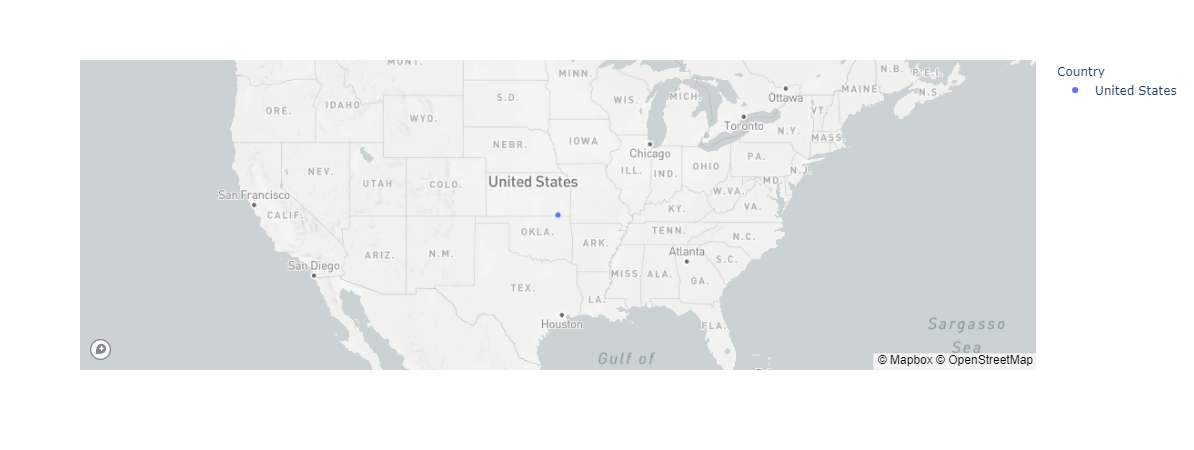

In [116]:
# Plot Data
map_plot = px.scatter_mapbox(
    ticker_df2,
    lat="Latitude",
    lon="Longitude",
    size="ESG Score",
    color="Country",
    zoom=3
)

# Display the map
map_plot.show()